In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("tested.csv")

In [3]:
data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [4]:
data.fillna(data.mean(), inplace=True)  # Fill missing numerical values with mean
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)  # Fill missing categorical value with mode

TypeError: Could not convert ['malefemalemalemalefemalemalefemalemalefemalemalemalemalefemalemalefemalefemalemalemalefemalefemalemalemalefemalemalefemalemalefemalemalemalemalemalemalefemalefemalemalemalefemalefemalemalemalemalemalemalefemalefemalemalemalemalefemalefemalemalemalefemalefemalemalemalemalemalemalefemalemalemalemalefemalemalefemalefemalemalemalefemalefemalemalefemalemalefemalemalemalefemalemalefemalemalemalemalemalemalemalefemalefemalefemalemalefemalemalefemalemalemalemalefemalemalefemalemalefemalemalemalemalefemalemalemalemalemalemalemalefemalefemalefemalefemalemalemalefemalemalefemalefemalemalefemalemalemalefemalemalefemalemalemalemalemalefemalemalemalemalemalemalefemalemalefemalefemalemalemalemalemalemalemalemalemalefemalemalemalefemalemalemalefemalefemalemalefemalefemalemalefemalemalemalefemalemalemalefemalefemalemalemalemalemalemalefemalefemalemalefemalefemalemalemalefemalemalefemalemalefemalemalefemalemalemalemalemalemalemalemalemalefemalemalefemalefemalemalemalefemalemalemalefemalemalefemalemalemalemalemalefemalefemalemalefemalemalefemalemalefemalemalefemalemalefemalefemalemalefemalemalemalemalefemalemalemalemalemalemalemalefemalefemalefemalefemalemalemalemalemalefemalemalefemalefemalefemalemalemalemalemalemalemalemalefemalemalemalemalefemalefemalemalemalemalemalefemalemalemalemalefemalefemalemalefemalemalemalemalemalefemalemalefemalefemalefemalemalemalemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalemalemalemalefemalefemalemalemalemalefemalemalemalemalefemalefemalefemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalefemalemalemalefemalemalemalemalemalemalemalemalemalemalefemalemalefemalemalefemalemalefemalefemalemalemalemalefemalemalefemalemalemalefemalemalefemalefemalemalefemalefemalemalefemalefemalemalemalefemalemalemalefemalefemalefemalemalemalemalemalemalefemalefemalemalefemalemalemalemalemalemalefemalemalemalemalefemalemalefemalemalemalefemalemalefemalemalemalemalemalemalefemalefemalefemalefemalefemalemalefemalemalemalemale'
 'QSQSSSQSCSSSSSSCQCSCCSSCCSCCSCSSSSCCSSSSCSSSSSCQCSSCSSCQSSSCSSSQCSQSCSQSSCCCSSSQCSSSQCQSQSSSSSCSSSSSCSQSCSQQSSCQCQSCCSCSSQCSQSSQSSSCSCSSCSSSSSCSSSSSSSCCSSSSSSSSQCSSSSCSCSSCSCSSSCSCSCSQCSSSSSSSSQSSCSSSQSCSSCQSCSSSSSSSQSCSCSSSCCSQSSSSSQCSCCSCCSCSSSSSSCSSCSSSQSSSSSSSCSSSSSCQCQCSSSSSSSQCSSSSCSSQCSSSCCSSSCSSQSSSSSSCSQCQCSSSSCSSSSSCSSSCCCSSSCSCSSSCSSSCSSCSSSSSSSQSSCSSCSCSCCSCSSSCSSSSQQSSSSSSQSSSSSSSQCSQSSCSCCSCQSQQSSCSSC'] to numeric

In [5]:
data = pd.get_dummies(data, columns=["Sex", "Embarked"])

In [6]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
dt_classifier = DecisionTreeClassifier(criterion="entropy")  # ID3 algorithm uses entropy
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
y_pred = dt_classifier.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


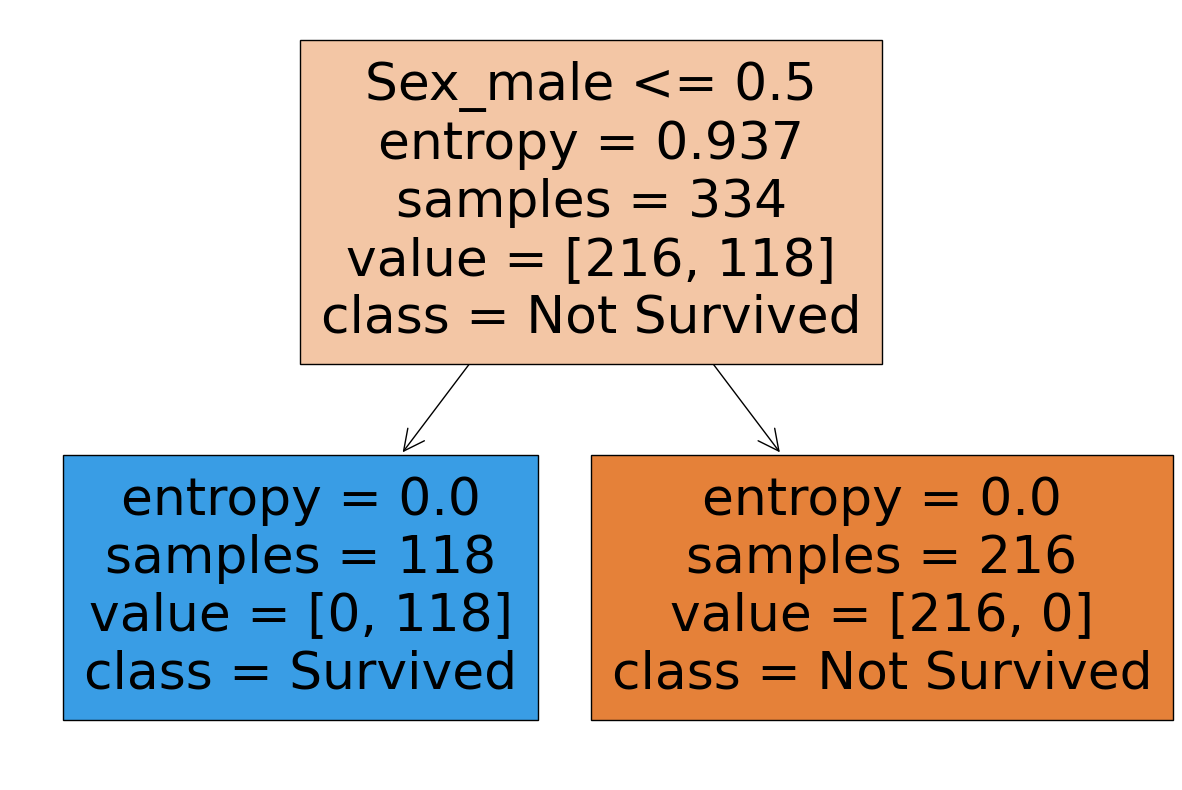

In [11]:
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"])
plt.show()